![](logo.png)

## Day Objectives
# Voting Classifier
- A Voting Classifier is a machine learning model
- predicts an output (class) based on their highest probability of chosen class as the output.
- Voting classifier is quite effective with good estimators & handles individual's limitations, ensemble methods can also participate.
- It's used for both classification and regression
- **Voting Classifier supports two types of votings**
    - Hard Voting: the predicted output class is a class with the highest majority of votes
        - the class which had the highest probability of being predicted by each of the classifiers
    - Soft Voting : the output class is the prediction based on the average of probability given to that class

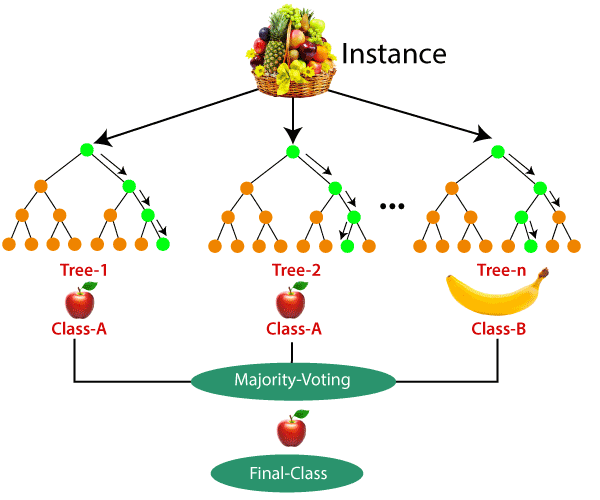




Hard -Voting:

algo1 - -apple
algo2 - -apple
algo3 - -apple
algo4 - -banana

output - -apple

Soft -voting:

sub -: -math,ph,che
alg1 - -(80.5,97.6,68) - -82%
alg2 - -(68.6,78.7,90.9) - -79.4%
alg3 - -(69.8,98.8,90) - -86.2%

output -alg3 - -86.2%

In [2]:
(80.5+97.6+68)/3

82.03333333333333

In [3]:
(69.8+98.8+90)/3

86.2

In [5]:
import pandas as pd
import numpy as np

In [6]:
from sklearn.datasets import load_digits

In [7]:
digits = load_digits()

In [8]:
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

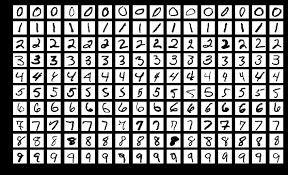

In [9]:
df = pd.DataFrame(digits.data,columns = digits.feature_names)
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [11]:
df["Target"]=digits.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [12]:
df["Target"].value_counts()

3    183
5    182
1    182
6    181
4    181
9    180
7    179
0    178
2    177
8    174
Name: Target, dtype: int64

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn =KNeighborsClassifier(n_neighbors=5)

In [16]:
X =df[df.columns[: -1]]
X.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [17]:
8*8

64

In [18]:
y =df["Target"]

In [19]:
from sklearn.model_selection import train_test_split
X1,X2,y1,y2=train_test_split(X,y,test_size=0.25,random_state=42)

In [20]:
knn.fit(X1,y1)

KNeighborsClassifier()

In [23]:
yPred=knn.predict(X2)

In [24]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(y2,yPred)*100

99.33333333333333

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rcls=RandomForestClassifier(max_depth=5)

In [29]:
rcls.fit(X1,y1)

RandomForestClassifier(max_depth=5)

In [31]:
y=rcls.predict(X2)
accuracy_score(y2,y)*100

93.77777777777779

In [ ]:
Decision -Tree -accuracy_score : 

In [ ]:
svc -accuracy_score : 

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dcls=DecisionTreeClassifier(max_depth=5)

In [35]:
dcls.fit(X1,y1)

DecisionTreeClassifier(max_depth=5)

In [37]:
ypredicted  =dcls.predict(X2)

In [39]:
accuracy_score(y2,ypredicted)*100

67.33333333333333

In [42]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [82]:
estimators = [
    ("knn",KNeighborsClassifier(n_neighbors=5)),
    ("rf",RandomForestClassifier(n_estimators=20,max_depth=5)),
    ("svc",SVC(kernel='rbf',probability=False)),
     ("DT",DecisionTreeClassifier(max_depth=5)),
     ("Lr",LogisticRegression())
] 

In [83]:
vclass =VotingClassifier(estimators=estimators,voting="hard")

In [84]:
vclass

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('rf',
                              RandomForestClassifier(max_depth=5,
                                                     n_estimators=20)),
                             ('svc', SVC()),
                             ('DT', DecisionTreeClassifier(max_depth=5)),
                             ('Lr', LogisticRegression())])

In [85]:
vclass.fit(X1,y1)

C:\Users\lavan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('rf',
                              RandomForestClassifier(max_depth=5,
                                                     n_estimators=20)),
                             ('svc', SVC()),
                             ('DT', DecisionTreeClassifier(max_depth=5)),
                             ('Lr', LogisticRegression())])

In [86]:
ypred=vclass.predict(X2)

In [87]:
accuracy_score(y2,ypred)*100

98.88888888888889

In [88]:
for est,name in zip(vclass.estimators_,vclass.estimators):
    print(est,name)

KNeighborsClassifier() ('knn', KNeighborsClassifier())
RandomForestClassifier(max_depth=5, n_estimators=20) ('rf', RandomForestClassifier(max_depth=5, n_estimators=20))
SVC() ('svc', SVC())
DecisionTreeClassifier(max_depth=5) ('DT', DecisionTreeClassifier(max_depth=5))
LogisticRegression() ('Lr', LogisticRegression())


In [89]:
vclass.estimators_

[KNeighborsClassifier(),
 RandomForestClassifier(max_depth=5, n_estimators=20),
 SVC(),
 DecisionTreeClassifier(max_depth=5),
 LogisticRegression()]

In [90]:
vclass.estimators

[('knn', KNeighborsClassifier()),
 ('rf', RandomForestClassifier(max_depth=5, n_estimators=20)),
 ('svc', SVC()),
 ('DT', DecisionTreeClassifier(max_depth=5)),
 ('Lr', LogisticRegression())]

In [91]:
for est,name in zip(vclass.estimators_,vclass.estimators):
    print(name[0],est.score(X2,y2)*100,"%")

knn 99.33333333333333 %
rf 94.44444444444444 %
svc 98.66666666666667 %
DT 66.66666666666666 %
Lr 97.33333333333334 %


# soft -Voting

In [92]:
vclass =VotingClassifier(estimators=estimators,voting="soft",weights=None)

In [93]:
vclass.fit(X1,y1)

C:\Users\lavan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('rf',
                              RandomForestClassifier(max_depth=5,
                                                     n_estimators=20)),
                             ('svc', SVC()),
                             ('DT', DecisionTreeClassifier(max_depth=5)),
                             ('Lr', LogisticRegression())],
                 voting='soft')

In [94]:
ypredicted=vclass.predict(X2)

AttributeError: predict_proba is not available when  probability=False

In [95]:
help(vclass)

Help on VotingClassifier in module sklearn.ensemble._voting object:

class VotingClassifier(sklearn.base.ClassifierMixin, _BaseVoting)
 |  VotingClassifier(estimators, *, voting='hard', weights=None, n_jobs=None, flatten_transform=True, verbose=False)
 |  
 |  Soft Voting/Majority Rule classifier for unfitted estimators.
 |  
 |  .. versionadded:: 0.17
 |  
 |  Read more in the :ref:`User Guide <voting_classifier>`.
 |  
 |  Parameters
 |  ----------
 |  estimators : list of (str, estimator) tuples
 |      Invoking the ``fit`` method on the ``VotingClassifier`` will fit clones
 |      of those original estimators that will be stored in the class attribute
 |      ``self.estimators_``. An estimator can be set to ``'drop'``
 |      using ``set_params``.
 |  
 |      .. versionchanged:: 0.21
 |          ``'drop'`` is accepted.
 |  
 |      .. deprecated:: 0.22
 |         Using ``None`` to drop an estimator is deprecated in 0.22 and
 |         support will be dropped in 0.24. Use the strin

In [96]:
for est,name in zip(vclass.estimators_,vclass.estimators):
    print(name[0],est.score(X2,y2)*100,"%")

knn 99.33333333333333 %
rf 92.44444444444444 %
svc 98.66666666666667 %
DT 67.33333333333333 %
Lr 97.33333333333334 %


In [99]:
accuracy_score(y2,yPred)*100

99.33333333333333

## Boosting classifier 
- It is an ensemble modeling technique which attempts to build a strong classifier from the number of weak classifiers

**AdaBoost** 
- It was the first really successful boosting algorithm developed for the purpose of binary classification.
- AdaBoost is short for Adaptive Boosting and is a very popular boosting technique which combines multiple “weak classifiers” into a single “strong classifier”.
- Boosting in general is about building a model from the training data, then creating a second model that attempts to correct the errors from the first model. Models are added until the training set is predicted perfectly or a maximum number of models are added.
- AdaBoost can be used for both classification & regression

In [100]:
dcls.fit(X1,y1)

DecisionTreeClassifier(max_depth=5)

In [102]:
y=dcls.predict(X2)

In [111]:
print("DesicionTree -classifier -accuracy -",accuracy_score(y2,y)*100)


DesicionTree -classifier -accuracy - 67.55555555555556


In [105]:
from sklearn.ensemble import AdaBoostClassifier,

In [106]:
adcls=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5))

In [107]:
adcls.fit(X1,y1)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5))

In [108]:
yp=adcls.predict(X2)

In [113]:
print("After -appling -Adaboosting classifier: ",accuracy_score(y2,yp)*100,"%")

After -appling -Adaboosting classifier:  94.88888888888889 %


In [114]:
data =pd.read_csv("https://raw.githubusercontent.com/LavanyaPolamarasetty/Datasets/master/Regression/manhattan_Housing.csv")
data.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [115]:
data.shape

(3539, 18)

In [116]:
data.corr()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
rental_id,1.000000,-0.134347,-0.070290,-0.109414,-0.107711,0.009615,-0.082586,0.028543,0.064919,-0.023335,-0.072738,-0.057786,-0.060152,-0.029615,-0.004253,-0.023457
rent,-0.134347,1.000000,0.638336,0.769474,0.857954,0.035164,0.215867,-0.128895,-0.101497,0.035165,0.053873,0.031302,0.051860,0.052241,0.029302,0.040609
bedrooms,-0.070290,0.638336,1.000000,0.720885,0.771263,0.076543,0.043539,0.037228,-0.100352,0.002938,0.008721,-0.017331,-0.006771,0.005467,0.003037,-0.004112
bathrooms,-0.109414,0.769474,0.720885,1.000000,0.803627,0.086932,0.127969,-0.095421,-0.062205,0.019556,0.025752,0.014745,0.021150,0.038829,0.042304,0.029739
size_sqft,-0.107711,0.857954,0.771263,0.803627,1.000000,0.039448,0.107186,0.014489,-0.141451,0.024822,0.038263,0.026098,0.040916,0.050364,0.021921,0.029347
min_to_subway,0.009615,0.035164,0.076543,0.086932,0.039448,1.000000,0.082445,-0.184682,0.080088,-0.020693,-0.001327,-0.009012,-0.000410,-0.012244,0.001500,-0.004315
floor,-0.082586,0.215867,0.043539,0.127969,0.107186,0.082445,1.000000,-0.389260,0.104317,0.056322,0.038870,0.095963,0.068917,0.002337,0.059423,0.065410
building_age_yrs,0.028543,-0.128895,0.037228,-0.095421,0.014489,-0.184682,-0.389260,1.000000,-0.221429,-0.041305,-0.030014,-0.047265,-0.060627,-0.027420,-0.050321,-0.063110
no_fee,0.064919,-0.101497,-0.100352,-0.062205,-0.141451,0.080088,0.104317,-0.221429,1.000000,-0.095718,-0.070324,-0.182547,-0.161519,-0.078660,-0.049684,-0.101230
has_roofdeck,-0.023335,0.035165,0.002938,0.019556,0.024822,-0.020693,0.056322,-0.041305,-0.095718,1.000000,0.313459,0.489836,0.516534,0.331999,0.122568,0.561626


In [117]:
X =data[["size_sqft","bathrooms","bedrooms"]]

In [119]:
y =data["rent"]

In [120]:
Xt,Xtest,yt,ytest =train_test_split(X,y)

In [121]:
from sklearn.ensemble import AdaBoostRegressor

In [122]:
from sklearn.tree import DecisionTreeRegressor
adreg=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5))

In [123]:
adreg.fit(Xt,yt)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5))

In [124]:
yp=adreg.predict(Xtest)

In [126]:
from sklearn.metrics import r2_score
r2_score(ytest,yp)*100


74.24236743049667

In [127]:
dreg=DecisionTreeRegressor(max_depth=5)

In [128]:
dreg.fit(Xt,yt)

DecisionTreeRegressor(max_depth=5)

In [130]:
y=dreg.predict(Xtest)

In [132]:
r2_score(ytest,y)*100

75.40130243755385

s1 -A
S2 -A
S3 -B
S4 -B

A
B